## ML_Assignment 

## Sentiment Analysis By Abhishek  Pandey

### Importing Libraries

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

### Loading Dataset

In [2]:
messages = pd.read_csv('Twitter_data.csv',index_col='Sn')
del messages['Subjectivity']
messages.head()

,Tweets,Polarity,Analysis
Sn,,,
0,CapeOfGoodFilms 80,0.000000,Neutral
1,The Batras are waiting to meet you again! Good...,0.000000,Neutral
2,Very excited about the launch of my friend ’s ...,0.364167,Positive
3,"Couldn’t agree more , it’s the need of the ho...",0.500000,Positive
4,How can I forget Abbas Mustan bhai...it’s not ...,0.000000,Neutral


This dataset contains 100 tweets and it has been taken from github project as my twitter api apllication was not approved.      " https://github.com/harit198/Tweet-Analyzer " this is the link to that project .

### Downloading Stopwords 

In [3]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Doing Some Data Cleaning and Preprocessing

In [4]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Tweets'][i])
    review =  review.lower()
    
    # remove any urls
    review = re.sub(r"http\S+|www\s+|https\S+","",review, flags=re.MULTILINE)
    
    
    # remove user  @reference and # from tweet
    review = re.sub(r'\@\w+|\#',"",review)
    
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
    

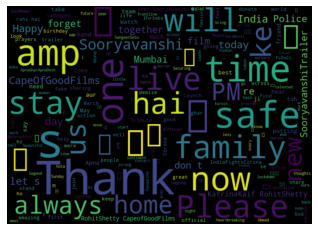

In [16]:
# word cloud visualization
allWords = ' '.join([twts for twts in messages['Tweets']])
wordCloud = WordCloud(width=700, height=500, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

This is showing the frequency of the words in the tweets

### Creating Model

In [5]:
# Creating the Bag of Words model

cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(messages['Polarity'])
y=y.iloc[:,1].values


### Splitting the Data and Fitting Data into Naive Bayes

In [6]:
# Train Test Split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier


spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)


### Now as we have trained the Model . Now we will check the accuracy of the Trained the Model 

In [15]:
def get_Sentiment(X):
        y = spam_detect_model.predict(X)
        if (y<0):
            print('Negative')
        elif (y>0):
            print('Positive')
        else :
            print('Neutral')

In [12]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    # iterate over each label and check
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
    # compute the accuracy
    accuracy = correct_predictions/len(y_true)
    return accuracy


compute_accuracy(y_test,y_pred)

0.95

We can also check it through Predefined function "accuracy_score" 

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.95